In [7]:
import numpy as np 
import math 
from scipy.integrate import quad
from matplotlib import pyplot as plt
from matplotlib import cm
c,h, pi,e,k = 299792458, 6.62607015*10**(-34), math.pi,math.e,1.380649*10**(-23)
numPoints = 10000

In [8]:
def planckLaw(frequency,temperature):
    part1 = (h*2*frequency**3)/(c**2)
    part2 = np.exp((h*frequency)/(k*temperature))-1
    return part1/part2

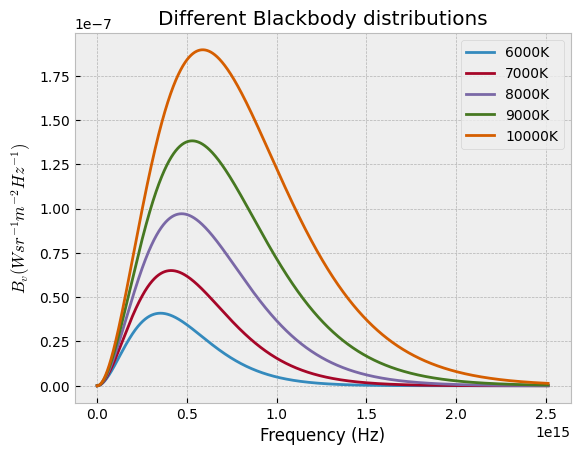

In [9]:
random = np.linspace(10,15.4,numPoints)
freq = 10**random #The reason I do it this way is because linspace is biased to large numbers, so if
#I just did linspace(10**10,10**15.5,numPoints), it would be be skewed in favor of either large or small
#orders of magnitude. This way we remove this bias
plt.style.use('bmh') #A style I really like to use
temperatureArray = [6000,7000,8000,9000,10000] #I m gonna use many temperature to showcase the universality of the Planck law
#Of course, they would still contain the temperature that are mentioned in the book
for temp in temperatureArray:
    plt.plot(freq,planckLaw(freq,temp),label=f'{temp}K') #We will recalculate them each time.Although this seems wastefull
    #The calcualtions are so fast it does not matter
plt.title('Different Blackbody distributions')
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$B_v (W sr^{-1} m^{-2} Hz^{-1})$")
plt.legend()
plt.show()
#The other temperatures were added for continuity

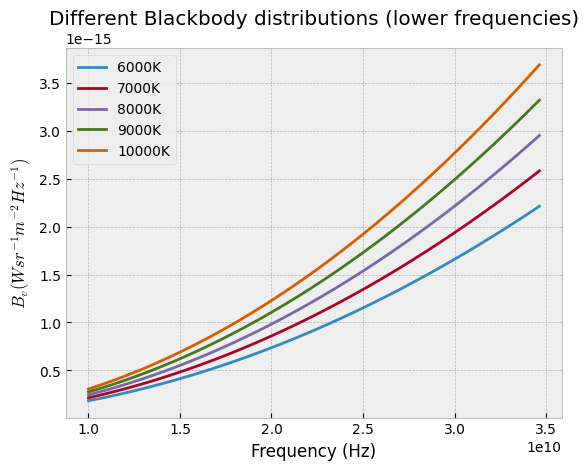

In [10]:
lowFreq = freq[0:1000]
for temp in temperatureArray:
    plt.plot(lowFreq,planckLaw(lowFreq,temp),label=f'{temp}K')
plt.title('Different Blackbody distributions (lower frequencies)')
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$B_v (W sr^{-1} m^{-2} Hz^{-1})$")
plt.legend()
plt.show()
#As we can see, it is true that at lower frequencies they must follow a power low fo some sort. 
#Lets go about finding it out

In [11]:
def fitFunc(x,a):
    return a*x**2
from scipy.optimize import curve_fit
fitArray = []
for temp in temperatureArray:
    fitArray.append(curve_fit(fitFunc,lowFreq,planckLaw(lowFreq,temp))) #The curve fit function returns
    # the best fit for parameter a and the covariance

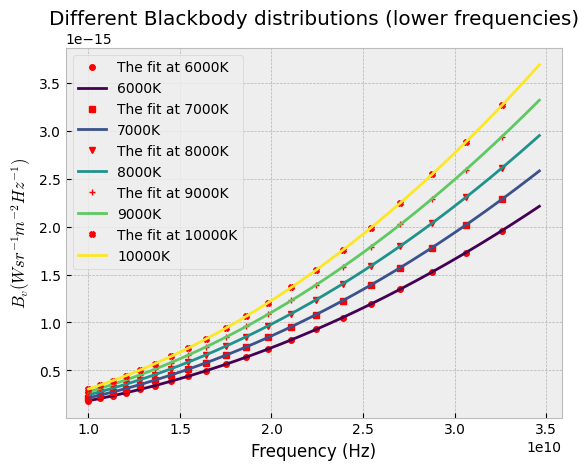

In [12]:
#!TODO make a color generator this is atrocious
colorMap = plt.get_cmap('viridis', len(temperatureArray))
markers = ["o","s","v","+","X"]
for index, (temp,fitValue) in enumerate(zip(temperatureArray,fitArray)):
    color = colorMap(index)
    plt.plot(lowFreq[::50],fitFunc(lowFreq[::50],fitValue[0]),marker=markers[index],markersize=4,linestyle='None',label=f'The fit at {temp}K',color='red')
    plt.plot(lowFreq,planckLaw(lowFreq,temp),label=f'{temp}K',color=color)
plt.title('Different Blackbody distributions (lower frequencies)')
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$B_v (W sr^{-1} m^{-2} Hz^{-1})$")
plt.legend()
plt.show()
#As it can be seen there is great agreement between the relationship we proposed at lower frequencies with
#Plancks law

In [13]:
for element in fitArray:
    print("The convariance is : " + str(element[1]))
#The covariancies are extremely small and thus we can be certain we made the correct fit

The convariance is : [[1.6050087e-84]]
The convariance is : [[1.60503968e-84]]
The convariance is : [[1.60506293e-84]]
The convariance is : [[1.60508097e-84]]
The convariance is : [[1.60509546e-84]]


In [14]:
#The stefan boltzman constant can be found as :
s,trueS = (2*pi**5*k**4)/(15*c**2*h**3), 5.670374419*10**(-8)

print(f"We found the value: {s} and the true value is: {trueS}")

We found the value: 5.670374419184431e-08 and the true value is: 5.670374419e-08


In [15]:
def findLargest(freq,temp):
    distribution = planckLaw(freq,temp)
    index = np.argmax(distribution) #It finds the index of the largest element
    return freq[index],distribution[index] #Returns the frequency and the distribution at the peak

In [16]:
largestArray = []
for temp in temperatureArray:
    largestArray.append(findLargest(freq,temp))

In [17]:
for index, element in enumerate(largestArray):
    print(f"The largest value is : {element[1]} and is found at {element[0]} Hz, for temperature {temperatureArray[index]} K")

The largest value is : 4.095502280816616e-08 and is found at 352577606721220.44 Hz, for temperature 6000 K
The largest value is : 6.503506248752617e-08 and is found at 411359396491216.44 Hz, for temperature 7000 K
The largest value is : 9.707858047520406e-08 and is found at 470486595658931.0 Hz, for temperature 8000 K
The largest value is : 1.38223189137733e-07 and is found at 528825430035927.2 Hz, for temperature 9000 K
The largest value is : 1.8960662578807435e-07 and is found at 587782865392125.6 Hz, for temperature 10000 K


In [18]:
#I am going to use the quad function from Scipy, to integrate the distribution. It returns a tuple,
#of the integration and its error
#The total value is:
tolerance = 10**(-1)
total = quad(planckLaw,tolerance,10**17,args=(6000,))[0]
newRandom = np.linspace(1,16,numPoints)
newFreq = 10**newRandom
ratioArray = np.array([quad(planckLaw,tolerance,f,args=(6000,))[0]/total for f in newFreq])

C:\Users\grega\AppData\Local\Temp\ipykernel_19604\2763319078.py:3: RuntimeWarning: overflow encountered in exp
  part2 = np.exp((h*frequency)/(k*temperature))-1


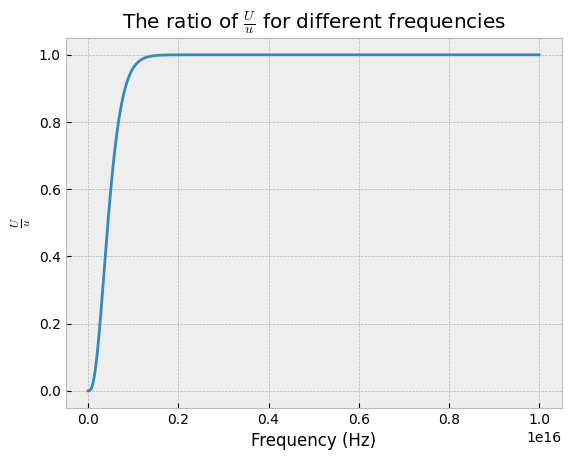

In [19]:

plt.plot(newFreq,ratioArray)
plt.title(r'The ratio of $\frac{U}{u}$ for different frequencies')
plt.ylabel(r'$\frac{U}{u}$')
plt.xlabel('Frequency (Hz)')
plt.show()

In [20]:
newTemps,vBounds = [6000,1000,100000], (4.3*10**(14),7.5*10**(14))
newRatioArray = []
for temp in newTemps:
    total = quad(planckLaw,tolerance,10**17,args=(temp,))[0]
    portion = quad(planckLaw,*vBounds,args=(temp,))[0]
    newRatioArray.append(portion/total)

C:\Users\grega\AppData\Local\Temp\ipykernel_19604\2763319078.py:3: RuntimeWarning: overflow encountered in exp
  part2 = np.exp((h*frequency)/(k*temperature))-1


In [21]:
newRatioArray
#Frequencies near the Wien maximum are gonna have the largest contribution to the total emission
#thus for 6000K Kelvin we observe the largest portion as the maximum is inside these frequencies

[0.373217102374174, 1.7119926641020356e-06, 0.0016689265551028873]